## 2. Functions and CEO Incomes

In this question, we'll look at the 2015 compensation of CEOs at the 100 largest companies in California. The data was compiled from a [Los Angeles Times analysis](http://spreadsheets.latimes.com/california-ceo-compensation/), and ultimately came from [filings](https://www.sec.gov/answers/proxyhtf.htm) mandated by the SEC from all publicly-traded companies. Two companies have two CEOs, so there are 102 CEOs in the dataset.

We've copied the raw data from the LA Times page into a file called `raw_compensation.csv`. (The page notes that all dollar amounts are in **millions of dollars**.)

In [2]:
import numpy as np
import pandas as pd

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
raw_compensation = pd.read_csv('/home/ashly/Downloads/raw_compensation.csv')
print(raw_compensation.shape)
#raw_compensation=np.array(raw_compensation)

(102, 9)


We want to compute the average of the CEOs pay. Try running the 2 cells below.

In [3]:
np.average(raw_compensation['Total Pay'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [4]:
raw_compensation['Total Pay'].mean()

TypeError: Could not convert $53.25 $53.24 $44.91 $35.98 $33.36 $24.84 $22.04 $19.86 $19.62 $19.32 $18.76 $18.61 $18.36 $18.09 $17.10 $16.63 $16.33 $16.14 $16.10 $16.02 $15.10 $14.98 $14.63 $14.51 $14.44 $14.36 $14.31 $14.09 $14.00 $13.67 $12.34 $12.20 $12.18 $12.13 $12.05 $11.84 $11.71 $11.63 $11.16 $11.11 $11.11 $10.73 $10.50 $10.43 $10.37 $10.28 $10.27 $10.18 $10.16 $9.97 $9.96 $9.86 $9.74 $9.42 $9.39 $9.22 $9.06 $9.03 $8.86 $8.76 $8.57 $8.38 $8.36 $8.35 $8.23 $7.86 $7.70 $7.58 $7.51 $7.23 $7.21 $7.12 $6.88 $6.77 $6.64 $6.56 $6.14 $5.92 $5.90 $5.89 $5.73 $5.42 $5.04 $4.92 $4.92 $4.47 $4.25 $4.08 $3.93 $3.72 $2.88 $2.83 $2.82 $2.45 $1.79 $1.68 $1.53 $0.94 $0.81 $0.07 $0.04 $0.00 to numeric

You should see a TypeError. Let's examine why this error occurred by looking at the values in the `Total Pay` column. 

**Question 2.1.** Use the `type` function and set `total_pay_type` to the type of the first value in the "Total Pay" column.

In [5]:
total_pay_type = type(raw_compensation['Total Pay'][0])
total_pay_type


str

**Question 2.3.** Convert `mark_hurd_pay_string` to a number of *dollars*. 

Some hints, as this question requires multiple steps:
- The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  
- You'll also need the function `float`, which converts a string that looks like a number to an actual number.  
- Finally, remember that the answer should be in dollars, not millions of dollars.


In [6]:
mark_hurd_pay = raw_compensation['Total Pay'][0].strip("$")
mark_hurd_pay=float(mark_hurd_pay)
mark_hurd_pay*(10**6)

53250000.0

To compute the average pay, we need to do this for every CEO.  But that looks like it would involve copying this code 102 times.

This is where functions come in.  First, we'll define a new function, giving a name to the expression that converts "total pay" strings to numeric values.  Later in this lab, we'll see the payoff: we can call that function on every pay string in the dataset at once.

The next section of this lab explains how to define a function For now, just fill in the ellipses in the cell below.

**Question 2.4.** Copy the expression you used to compute `mark_hurd_pay`, and use it as the return expression of the function below. But make sure you replace the specific `mark_hurd_pay_string` with the generic `pay_string` name specified in the first line in the `def` statement.

*Hint*: When dealing with functions, you should generally not be referencing any variable outside of the function. Usually, you want to be working with the arguments that are passed into it, such as `pay_string` for this function. If you're using `mark_hurd_pay_string` within your function, you're referencing an outside variable!

In [7]:
def convert_pay_string_to_number(pay_string):
    """Converts a pay string like '$100' (in millions) to a number of dollars."""
    #pay_string=str(pay_string)
    pay_string= pay_string.strip('$')
    pay_string=float(pay_string)
    
    return pay_string*(10**6)

Running that cell doesn't convert any particular pay string. Instead, it creates a function called `convert_pay_string_to_number` that can convert *any* string with the right format to a number representing millions of dollars.

We can call our function just like we call the built-in functions we've seen. It takes one argument -- a string -- and it returns a float.

In [8]:
convert_pay_string_to_number('$42')

42000000.0

In [11]:
mark_hurd_pay_string=raw_compensation['Total Pay'][0]
convert_pay_string_to_number(mark_hurd_pay_string)



53250000.0

In [233]:
# We can also compute Safra Catz's pay in the same way: But this time extract the details from the record that matches his first name 'Safra' and then proceed
#You can break it down into multiple steps or combine into one line

53240000.0

In [271]:
#name_matching
def name_pay(name):
    d=raw_compensation.index[raw_compensation['Name'].str.contains(name)].tolist()
    e=d[0]
    return convert_pay_string_to_number(raw_compensation['Total Pay'][e])
o=name_pay('Safra')
o


53240000.0

So, what have we gained by defining the `convert_pay_string_to_number` function? 
Well, without it, we'd have to copy the code `10**6 * float(some_pay_string.strip("$"))` each time we wanted to convert a pay string.  Now we just call a function whose name says exactly what it's doing.

## 3. `apply`ing functions

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the text "data"!

For example, we can make a new name for the built-in function `max` if we want:

In [224]:
our_name_for_max = max
our_name_for_max(2, 6)

6

The old name for `max` is still around:

In [225]:
max(2, 6)

6

Try just writing `max` or `our_name_for_max` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [226]:
max

<function max>

Now try writing `?max` or `?our_name_for_max` (or the name of any other function) in a cell, and run that cell.  A information box should show up at the bottom of your screen a longer description of the function

*Note: You can also press Shift+Tab after clicking on a name to see similar information!*

In [227]:
?our_name_for_max

Let's look at what happens when we set `max`to a non-function value. You'll notice that a TypeError will occur when you try calling `max`. Things like integers and strings are not callable. Look out for any functions that might have been renamed when you encounter this type of error

In [228]:
max = 6
max(2, 6)

TypeError: 'int' object is not callable

In [229]:
# This cell resets max to the built-in function. Just run this cell, don't change its contents
import builtins
max = builtins.max

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

**Question 3.1.** Make an array containing any 3 other functions you've seen.  Call it `some_functions`.


In [230]:
some_functions = [max, len, min, np.average]

In [231]:
some_functions= [np.mean , np.sum, np.multiply ]

Working with functions as values can lead to some funny-looking code. 

A more useful example of passing functions to other functions as arguments is the table method `apply`.

`apply` calls a function many times, once on *each* element in a column of a table.  It produces an *array* of the results.  Here we use `apply` to convert every CEO's pay to a number, using the function you defined:

In [203]:
raw_compensation['Total Pay'].apply(convert_pay_string_to_number)



0      53250000.0
1      53240000.0
2      44910000.0
3      35980000.0
4      33360000.0
          ...    
97       940000.0
98       810000.0
99        70000.0
100       40000.0
101           0.0
Name: Total Pay, Length: 102, dtype: float64

Here's an illustration of what that did:

Note that we didn’t write `raw_compensation.apply(convert_pay_string_to_number(), “Total Pay”)` or `raw_compensation.apply(convert_pay_string_to_number(“Total Pay”))`. We just passed the name of the function, with no parentheses, to `apply`, because all we want to do is let `apply` know the name of the function we’d like to use and the name of the column we’d like to use it on. `apply` will then call the function `convert_pay_string_to_number` on each value in the column for us!

**Question 3.2.** Using `apply`, make a table that's a copy of `raw_compensation` with one additional column called `Total Pay ($)`.  That column should contain the result of applying `convert_pay_string_to_number` to the `Total Pay` column (as we did above).  Call the new table `compensation`.

In [207]:
#Now that we have all the pays as numbers, we can learn more about them through computation.
raw_compensation['Total Pay($)']=raw_compensation['Total Pay'].apply(convert_pay_string_to_number)
compensation=raw_compensation
compensation

,Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay($)
0,1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000,53250000.0
1,2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000,53240000.0
2,3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000,44910000.0
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000,35980000.0
4,5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000,33360000.0
...,...,...,...,...,...,...,...,...,...,...
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,940000.0
98,99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,810000.0
99,100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000,70000.0
100,101,Elon R. Musk,Tesla Motors (Palo Alto),$0.04,6%,$0.04,$0.00,$0.00,0.46000,40000.0


In [208]:
average_total_pay = compensation['Total Pay($)'].mean()
average_total_pay

11445294.11764706

**Question 3.4.** Companies pay executives in a variety of ways: in cash, by granting stock or other equity in the company, or with ancillary benefits (like private jets).  Compute the proportion of each CEO's pay that was cash.  (Your answer should be an array of numbers, one for each CEO in the dataset.)

*Note:* When you answer this question, you'll encounter a red box appearing below your code cell that says something like `RuntimeWarning: invalid value encountered in true_divide`. Don't worry too much about the message. Warnings are raised by Python when it encounters an unusual condition in your code, but the condition is not severe enough to warrant throwing an error. 

The warning below is Python's cryptic way of telling you that you're dividing a number by zero. If you extract the values in `Total Pay ($)` as an array, you'll see that the last element is 0.

In [209]:
cash_proportion1 = compensation['Cash Pay'].apply(convert_pay_string_to_number)
cash_proportion2 = compensation['Equity Pay'].apply(convert_pay_string_to_number)
cash_proportion3 = compensation['Other Pay'].apply(convert_pay_string_to_number)
g= cash_proportion1+cash_proportion2+cash_proportion3
cash_proportion=cash_proportion1/g
cash_proportion


0      0.017844
1      0.017844
2      0.554220
3      0.027793
4      0.139388
         ...   
97     0.978947
98     0.876543
99     0.000000
100    1.000000
101         NaN
Length: 102, dtype: float64

Check out the `% Change` column in `compensation`.  It shows the percentage increase in the CEO's pay from the previous year.  For CEOs with no previous year on record, it instead says "(No previous year)".  The values in this column are *strings*, not numbers, so like the `Total Pay` column, it's not usable without a bit of extra work.

Given your current pay and the percentage increase from the previous year, you can compute your previous year's pay.  For example, if your pay is $\$120$ this year, and that's an increase of 50% from the previous year, then your previous year's pay was $\frac{\$120}{1 + \frac{50}{100}}$, or \$80.

**Question 3.5.** Create a new dataframe called `with_previous_compensation`.  It should be a copy of `compensation`, but with the "(No previous year)" CEOs filtered out, and with an extra column called `2014 Total Pay ($)`.  That column should have each CEO's pay in 2014.

*Hint 1:* You can print out your results after each step to make sure you're on the right track.

*Hint 2:* Whats provided below is a structure that you can use to get to the answer. However, if it's confusing, feel free to delete the current structure and approach the problem your own way!

In [231]:
def percent_string_to_num(percent_string):
    """Converts a percentage string to a number."""
    str(percent_string)   
    percent_string= percent_string.strip('%')
    percent_string=float(percent_string)
    
    return percent_string
#To drop the rows
with_previous_compensation=compensation[compensation['% Change']!='(No previous year)']
with_previous_compensation['% Change'].apply(percent_string_to_num)
#To Create New column and dataframe
pay_this_year=with_previous_compensation['Total Pay'].apply(convert_pay_string_to_number)
increase_from_pyear=with_previous_compensation['% Change'].apply(percent_string_to_num)
increase_from_pyear=1+(increase_from_pyear/100)
j=pay_this_year/increase_from_pyear
with_previous_compensation['2014 Total Pay ($)']=j
with_previous_compensation




    

<ipython-input-231-9774d58b73ba>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_previous_compensation['2014 Total Pay ($)']=j


,Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay($),2014 Total Pay ($)
2,3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000,44910000.0,4.629897e+07
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000,35980000.0,4.232941e+07
4,5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000,33360000.0,3.971429e+07
5,6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222.00000,24840000.0,2.587500e+07
6,7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183.00000,22040000.0,2.592941e+07
...,...,...,...,...,...,...,...,...,...,...,...
96,97,David G. Hirz,Smartæ& Final Stores (Commerce),$1.53,-66%,$1.50,$0.00,$0.04,26.00000,1530000.0,4.500000e+06
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,940000.0,1.056180e+06
98,99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,810000.0,8.709677e+05
100,101,Elon R. Musk,Tesla Motors (Palo Alto),$0.04,6%,$0.04,$0.00,$0.00,0.46000,40000.0,3.773585e+04


In [213]:
average_pay_2014 =with_previous_compensation['2014 Total Pay ($)'].mean()
average_pay_2014

11649176.115603436

**Why is `apply` useful?**

For operations like arithmetic, or the functions in the NumPy library, you don't need to use `apply`, because they automatically work on each element of an array.  But there are many things that don't.  The string manipulation we did in today's lab is one example.  Since you can write any code you want in a function, `apply` gives you total control over how you operate on data.

## 4. Histograms
Earlier, we computed the average pay among the CEOs in our 102-CEO dataset.  The average doesn't tell us everything about the amounts CEOs are paid, though.  Maybe just a few CEOs make the bulk of the money, even among these 102.

We can use a *histogram* method to display the *distribution* of a set of numbers.  The table method `hist` takes a single argument, the name of a column of numbers.  It produces a histogram of the numbers in that column.

**Question 4.1.** Make a histogram of the total pay of the CEOs in `compensation`. Check with your neighbor or a staff member to make sure you have the right plot.

**Question 4.2.** How many CEOs made more than $30 million in total pay? Find the value using code, then check that the value you found is consistent with what you see in the histogram.

<AxesSubplot:ylabel='Frequency'>

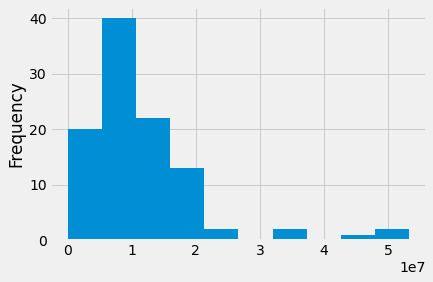

In [237]:
compensation['Total Pay($)'].plot.hist()



In [228]:
compensation[compensation['Total Pay($)']>30*(10**6)]

,Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay($)
0,1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.0,53250000.0
1,2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.0,53240000.0
2,3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.0,44910000.0
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.0,35980000.0
4,5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.0,33360000.0


In [229]:
num_ceos_more_than_30_million_2 = len(compensation[compensation['Total Pay($)']>30*(10**6)])
num_ceos_more_than_30_million_2

5